In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
anime = pd.read_csv("data/anime.csv")
rating = pd.read_csv("data/rating.csv")

In [7]:
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [6]:
rating.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


## 1. Recommender using Weighted Rating/Popularity

We will use the weighted rating metric that  IMDB uses for its top 250 movies

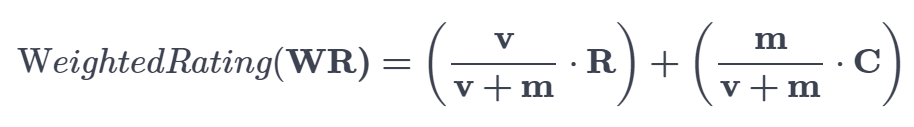

In [35]:
# To get the vote counts, we will first group rating data by the users (excluding those who have not left a rating)

rating2 = rating[(rating['rating'] != -1) & ~(rating['rating'].isnull())]
print(f'No. of rows dropped: {rating.shape[0] - rating2.shape[0]}')
rating_votes = rating2.groupby(['anime_id']).agg({"user_id": "count", "rating": "mean"})
rating_votes.rename(columns={'user_id': 'vote_counts', 'rating': 'average_rating'}, inplace=True)
rating_votes.reset_index(inplace=True)

No. of rows dropped: 1476496


In [36]:
# Calculate mean of vote average column
C = rating_votes['average_rating'].mean()

# minimum votes required to be counted in recommender
m = rating_votes['vote_counts'].quantile(0.70)

# Filter out all qualified animes into a new DataFrame
q_animes = rating_votes.copy().loc[rating_votes['vote_counts'] >= m]

In [37]:
# Function that computes the weighted rating of each movie
def weighted_rating(x, m=m, C=C):
    v = x['vote_counts']
    R = x['average_rating']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)


# Define a new feature 'score' and calculate its value with `weighted_rating()`
q_animes['score'] = q_animes.apply(weighted_rating, axis=1)

In [39]:
#Sort animes based on score calculated above
q_animes = q_animes.sort_values('score', ascending=False)

# Join dataframe with anime dataframe:
q_animes = q_animes.merge(anime, on='anime_id', how='inner')

#Print the top 15 animes
q_animes[['name', 'vote_counts', 'average_rating', 'score']].head(20)

,name,vote_counts,average_rating,score
0,Fullmetal Alchemist: Brotherhood,21494,9.322741,9.291360
1,Steins;Gate,17151,9.261326,9.223012
2,Hunter x Hunter (2011),7477,9.234586,9.149209
3,Clannad: After Story,15518,9.165292,9.124559
4,Kimi no Na wa.,1961,9.426313,9.106340
5,Gintama,4264,9.236398,9.090205
6,Gintama&#039;,3115,9.272552,9.073775
7,Code Geass: Hangyaku no Lelouch R2,21124,9.059837,9.031039
8,Gintama°,1188,9.449495,8.953935
9,Gintama&#039;: Enchousen,2126,9.202258,8.928394


Text(0, 0.5, 'Anime Title')

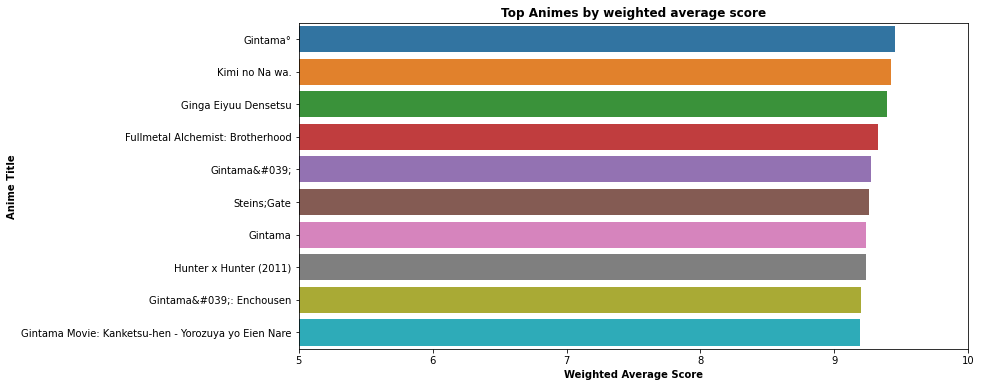

In [48]:
q_animes = q_animes.sort_values('average_rating', ascending=False)

plt.figure(figsize=(12,6))
ax = sns.barplot(x=q_animes['average_rating'].head(10),
                 y=q_animes['name'].head(10),
                 data=q_animes)

plt.xlim(5,10)
plt.title('Top Animes by weighted average score', weight='bold')
plt.xlabel('Weighted Average Score', weight='bold')
plt.ylabel('Anime Title', weight='bold')

We can see that the top 2 animes are "Gintama" and "Kimi no Na wa" and they are indeed amazing animes!

This is a way to recommend animes to users, by recommending animes based on top weighted ratings

Text(0, 0.5, 'Anime title')

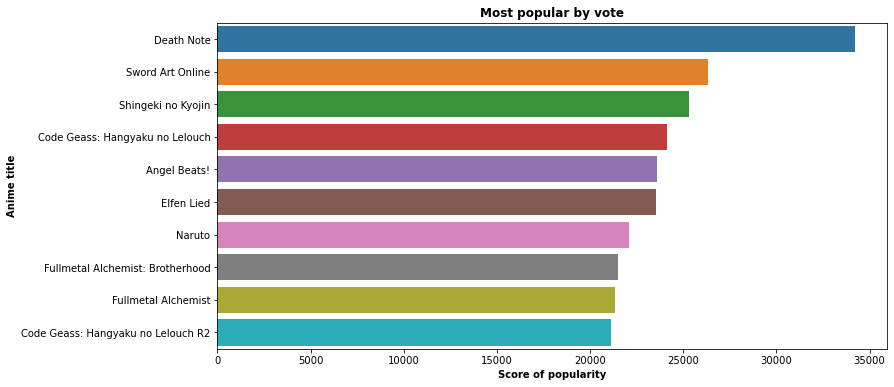

In [47]:
popularity = q_animes.sort_values('vote_counts', ascending=False)
plt.figure(figsize=(12,6))
ax=sns.barplot(x=popularity['vote_counts'].head(10), 
               y=popularity['name'].head(10), data=popularity)

plt.title('Most popular by vote', weight='bold')
plt.xlabel('Score of popularity', weight='bold')
plt.ylabel('Anime title', weight='bold')

Based on Popularity, Death Note won the game!   <br/>
Based on Average-votes, Gintama is the best!